# Style and Edit an NDEx Network

This Jupyter Notebook demonstrates how to download a NDEx network, perform two common operations, and upload the result using the ndex2 Python client and NiceCX object class. The notebook is composed of 5 sections that show how to complete the following tasks:

    I    Load a network from NDEx
    II   Copy and apply a visual style from an existing template in NDEx
    III  Save (upload) the modified network to your NDEx account
    IV   Apply a layout
    V    Save (update) the modified network to your NDEx account
    
The two networks used in this notebook can be found in the **2021 NDEx Current Protocols** tutorial account at http://ndexbio.org/#/user/bcb8f35a-a7a2-11eb-9e72-0ac135e8bacf


# Installation

The NDEx2 Python Client module can be installed from the Python Package Index (PyPI) repository using PIP:
```
pip install ndex2
```

If you already have an older version of the ndex2 module installed, you can use this command instead:
```
pip install --upgrade ndex2
```

# Resources

The Sphinx documentation for the ndex2 client package is at https://ndex2.readthedocs.io/en/latest/.

This and additional Jupyter Notebook with more advanced examples are available at https://github.com/ndexbio/ndex-jupyter-notebooks.

Examples for JavaScript and R can be found in the tutorial “Automation in the Cytoscape Ecosystem” available at https://github.com/cytoscape/cytoscape-ismb-2020/blob/master/README.md.



==================================================================================================================

==================================================================================================================

## Section I

### Load Network from NDEx

We will import a public network from NDEx into the python environment. Networks are provided a Universal Unique ID (UUID) by NDEx that can be used to reliably reference a particular network. We will load the network called "Sonic hedgehog" available here: http://ndexbio.org/viewer/networks/cfd3528f-a7a4-11eb-9e72-0ac135e8bacf. Please click the link to look at the network before we move forward with the next steps.

**ndex2.create_nice_cx_from_server** makes the request to the NDEx server URL with the UUID of the network. The server returns the network in CX format which is used to create a NiceCX object.

In [1]:
import ndex2

SERVER = 'http://ndexbio.org'
NETWORK_UUID = 'cfd3528f-a7a4-11eb-9e72-0ac135e8bacf'

#This is used to create clickable links to view the networks in NDEx
NETWORK_BASE_URL = 'http://ndexbio.org/viewer/networks/'

# Load a public network from NDEx
nice_cx_network = ndex2.create_nice_cx_from_server(SERVER, uuid=NETWORK_UUID)

In [2]:
# Use the "print_summary()" convenience function to get a summary of the imported network
nice_cx_network.print_summary()

Name: Sonic Hedgehog
Nodes: 18
Edges: 45
Node Attributes: 36
Edge Attributes: 450



We can also capitalize on the cyjupyter widget to display our network in the notebook using cytoscape.js

In [3]:
from cyjupyter import Cytoscape

# Convert the NiceCX object into a CX JSON object and visualize it with the CyJupyter widget
nice_cx_network_viz = nice_cx_network.to_cx()
Cytoscape(data=nice_cx_network_viz, format='cx')

Generating CX


Cytoscape(data=[{'numberVerification': [{'longNumber': 281474976710655}]}, {'metaData': [{'name': 'nodes', 'el…

Or simply generate a link to view our network in the browser:

In [4]:
# Click this link to view the network you just imported from NDEx in your browser
print("Network's URL (click to view!): " + NETWORK_BASE_URL + NETWORK_UUID)

Network's URL (click to view!): http://ndexbio.org/viewer/networks/cfd3528f-a7a4-11eb-9e72-0ac135e8bacf


==================================================================================================================

## Section II

### Copy Visual Style

One of the easiest ways to apply a visual style to a network is to copy that style from another network. This allows you you work on the style of your network in Cytoscape using the interactive style editor, then save the network to NDEx for future use as a template. The NiceCX class provides a special method for this common operation, both downloading the template and copying the style to the target network.

Here, we copy the visual style from this colorful template network in NDEx: http://www.ndexbio.org/#/network/b8ff8c89-a7b0-11eb-9e72-0ac135e8bacf and apply it to the 'Sonic Hedgehog' network we just imported from NDEx in the previous step:

In [4]:
TEMPLATE_UUID = 'b8ff8c89-a7b0-11eb-9e72-0ac135e8bacf'

# Copy the style from a template network in NDEx and apply it to our NiceCX network
nice_cx_network.apply_template(SERVER, TEMPLATE_UUID)

==================================================================================================================

## Section III

### Save Network to NDEx

NiceCX networks have a convenient one-step upload method. Saving a network to your account requires you to provide your NDEx username and password. We will now save the 'Sonic Hedgehog' network with its colorful visual style to the NDEx account you created earlier on, in Protocol 1 of this paper. 

In [5]:
# This is used to prompt users for NDEx credentials in this notebook
import getpass

In [6]:
# Watch out for typos and be sure to hit enter in the field to set the value!!!
NDEXUSER = getpass.getpass()

········


In [7]:
# Watch out for typos and be sure to hit enter in the field to set the value!!!
NDEXPASSWORD = getpass.getpass()

········


In [8]:
# Let's first rename our modified network
nice_cx_network.set_name('Sonic Hedgehog colorful (ndex2)')

# Then save it to NDEx and return the URL of the network's page as well as its UUID
response = nice_cx_network.upload_to(SERVER, NDEXUSER, NDEXPASSWORD)
my_network_uuid = response.split('/')[-1]

print ('=' *15)
print("Network's URL (click to view!): " + NETWORK_BASE_URL + my_network_uuid)
print("Network's UUID: " + my_network_uuid)

# Convert the NiceCX object into a CX JSON object and visualize it with the CyJupyter widget
nice_cx_network_viz = nice_cx_network.to_cx()
Cytoscape(data=nice_cx_network_viz, format='cx')

Generating CX
Network's URL (click to view!): http://ndexbio.org/viewer/networks/eb88bb58-495f-11ec-b3be-0ac135e8bacf
Network's UUID: eb88bb58-495f-11ec-b3be-0ac135e8bacf
Generating CX


Cytoscape(data=[{'numberVerification': [{'longNumber': 281474976710655}]}, {'metaData': [{'name': 'nodes', 'el…

#### You can now compare the visual style differences between the original 'Sonic Hedgehog' and your new 'Sonic Hedgehog colorful (ndex2)' networks.

==================================================================================================================

## Section IV

### Apply a layout

The ndex2 client and NiceCX class do not provide network manipulation functionalities; for such operations, the data must first be cast into a different data model, in this case a NetworkX object.

In the python environment, we will start from our NiceCX network and generate a NetworkX object using the NiceCX **to_networkx** method and then use the NetworkX spiral_layout method to assign positions to the nodes.

The result of the layout operation is a Python dictionary of positions keyed by nodes. We can display the network with the new layout using the NetworkX draw method, passing in the positions.

Finally, to set the new layout in the NiceCX network, we need to transform the NetworkX positions into a CX cartesianLayout aspect.

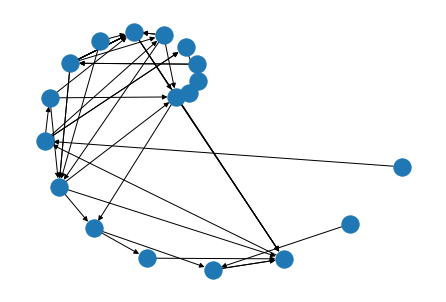

In [9]:
import networkx as nx

# Convert the network to a NetworkX object
NX_NETWORK = nice_cx_network.to_networkx(mode='default')

# Create layout and visualize it
pos = nx.drawing.layout.spiral_layout(NX_NETWORK, scale=700)
nx.draw(NX_NETWORK, pos)

In [10]:
# Transfer new layout back to original network
new_cart_layout = []
for node_id, coordinates in pos.items():
    new_cart_layout.append({
        'node': node_id,
        'x': coordinates[0],
        'y': -coordinates[1]   # See note below!!!
    })
nice_cx_network.set_opaque_aspect(ndex2.constants.CARTESIAN_LAYOUT_ASPECT, new_cart_layout)

***Note:***
*The minus sign in front of the ‘y’ coordinates in line 7 in the block of code above is required to ensure that the layout of your NiceCX network will be identical to that you previewed when drawing the NetworkX network. The reason for this is that NetworkX uses one convention for the zero position of cartesian coordinates (zero at bottom left) while Cytoscape/cytoscape.js/CX use another (zero at top right).  So, omitting the minus sign in line 7 would result in a NiceCX network with a vertically flipped layout.*

### Save (Update) Network to NDEx

NiceCX networks also have an **update_to** method to update an existing network instead of creating a new one; the target network to be updated is specified by its UUID and this **MUST** be the first argument passed in.
We will now update the 'Sonic Hedgehog colorful (ndex2)' network we saved earlier on, with its updated version boasting the new spiral layout.

In [11]:
# First, let's rename our modified network
nice_cx_network.set_name('Sonic Hedgehog colorful spiral (ndex2)')

# Update existing network in NDEx and return the URL of the network's page
# as well as its UUID
nice_cx_network.update_to(my_network_uuid, SERVER, NDEXUSER, NDEXPASSWORD)

print ('=' *15)
print("Network's URL (click to view!): " + NETWORK_BASE_URL + my_network_uuid)
print("Network's UUID: " + my_network_uuid)

# Convert the NiceCX object into a CX JSON object and visualize it with the CyJupyter widget
nice_cx_network_viz = nice_cx_network.to_cx()
Cytoscape(data=nice_cx_network_viz, format='cx')

Generating CX
Network's URL (click to view!): http://ndexbio.org/viewer/networks/eb88bb58-495f-11ec-b3be-0ac135e8bacf
Network's UUID: eb88bb58-495f-11ec-b3be-0ac135e8bacf
Generating CX


Cytoscape(data=[{'numberVerification': [{'longNumber': 281474976710655}]}, {'metaData': [{'name': 'nodes', 'el…

#### You can now verify that the 'Sonic Hedgehog colorful (ndex2)' network in your account has been replaced (updated) by the latest version that contains the spiral layout we added using NetworkX.

==================================================================================================================